<a href="https://colab.research.google.com/github/nagaraju5278/EVA4/blob/master/S7/EVA4S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/EVA4/S7/')
from all_imports import *
import get_train_test as tt
import train_test_loader as ttl
import get_model as gm
import train_test_def as ttd



CUDA Available? True


In [0]:
# sys.path

In [0]:
train = tt.get_train('CIFAR10')
test = tt.get_test('CIFAR10')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
train_loader, test_loader = ttl.get_train_test_loader(train,test)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = gm.get_model_instance(0.10).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,728
      BatchNorm2d-10          [-1, 128, 32, 32]             256
             ReLU-11          [-1, 128, 32, 32]               0
          Dropout-12          [-1, 128, 32, 32]               0
        MaxPool2d-13          [-1, 128, 16, 16]               0
           Conv2d-14           [-1

In [0]:
# model =  Net().to(device)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
# criterion = nn.CrossEntropyLoss()
# criterion1 = nn.CrossEntropyLoss(reduction='sum')
model = gm.get_model_instance(0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    a,b = ttd.train(model, device, train_loader, optimizer, epoch)
    train_losses.extend(a)
    train_acc.extend(b)
    c,d = ttd.test(model, device, test_loader)
    test_losses.extend(c)
    test_acc.extend(d)
    scheduler.step()
    print('')

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.2037640810012817 Batch_id=390 Accuracy=44.51: 100%|██████████| 391/391 [00:20<00:00, 18.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3304, Accuracy: 5262/10000 (52.62%)


EPOCH: 2


Loss=0.945513129234314 Batch_id=390 Accuracy=61.57: 100%|██████████| 391/391 [00:20<00:00, 19.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9830, Accuracy: 6516/10000 (65.16%)


EPOCH: 3


Loss=0.7202783823013306 Batch_id=390 Accuracy=68.68: 100%|██████████| 391/391 [00:20<00:00, 19.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8758, Accuracy: 6961/10000 (69.61%)


EPOCH: 4


Loss=0.8183143734931946 Batch_id=390 Accuracy=71.84: 100%|██████████| 391/391 [00:20<00:00, 19.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8551, Accuracy: 7022/10000 (70.22%)


EPOCH: 5


Loss=0.7184685468673706 Batch_id=390 Accuracy=74.61: 100%|██████████| 391/391 [00:20<00:00, 19.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7045, Accuracy: 7571/10000 (75.71%)


EPOCH: 6


Loss=0.576194167137146 Batch_id=390 Accuracy=76.57: 100%|██████████| 391/391 [00:20<00:00, 19.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6951, Accuracy: 7660/10000 (76.60%)


EPOCH: 7


Loss=0.609394907951355 Batch_id=390 Accuracy=77.77: 100%|██████████| 391/391 [00:19<00:00, 19.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7166, Accuracy: 7492/10000 (74.92%)


EPOCH: 8


Loss=0.5032185912132263 Batch_id=390 Accuracy=78.76: 100%|██████████| 391/391 [00:20<00:00, 19.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6647, Accuracy: 7695/10000 (76.95%)


EPOCH: 9


Loss=0.5284026861190796 Batch_id=390 Accuracy=79.67: 100%|██████████| 391/391 [00:19<00:00, 21.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6638, Accuracy: 7749/10000 (77.49%)


EPOCH: 10


Loss=0.37444227933883667 Batch_id=390 Accuracy=80.55: 100%|██████████| 391/391 [00:19<00:00, 19.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5920, Accuracy: 7940/10000 (79.40%)


EPOCH: 11


Loss=0.4685768485069275 Batch_id=390 Accuracy=81.26: 100%|██████████| 391/391 [00:19<00:00, 21.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5897, Accuracy: 7980/10000 (79.80%)


EPOCH: 12


Loss=0.5132872462272644 Batch_id=390 Accuracy=81.86: 100%|██████████| 391/391 [00:20<00:00, 21.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6148, Accuracy: 7942/10000 (79.42%)


EPOCH: 13


Loss=0.47020331025123596 Batch_id=390 Accuracy=82.38: 100%|██████████| 391/391 [00:19<00:00, 19.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5657, Accuracy: 8041/10000 (80.41%)


EPOCH: 14


Loss=0.5511094927787781 Batch_id=390 Accuracy=82.81: 100%|██████████| 391/391 [00:20<00:00, 19.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6246, Accuracy: 7846/10000 (78.46%)


EPOCH: 15


Loss=0.5560539960861206 Batch_id=390 Accuracy=83.25: 100%|██████████| 391/391 [00:20<00:00, 20.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5345, Accuracy: 8195/10000 (81.95%)


EPOCH: 16


Loss=0.373725026845932 Batch_id=390 Accuracy=86.07: 100%|██████████| 391/391 [00:20<00:00, 18.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4996, Accuracy: 8300/10000 (83.00%)


EPOCH: 17


Loss=0.35698622465133667 Batch_id=390 Accuracy=86.91: 100%|██████████| 391/391 [00:21<00:00, 18.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4852, Accuracy: 8338/10000 (83.38%)


EPOCH: 18


Loss=0.30473485589027405 Batch_id=390 Accuracy=87.04: 100%|██████████| 391/391 [00:20<00:00, 20.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4864, Accuracy: 8345/10000 (83.45%)


EPOCH: 19


Loss=0.3071470558643341 Batch_id=390 Accuracy=87.26: 100%|██████████| 391/391 [00:20<00:00, 18.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4804, Accuracy: 8366/10000 (83.66%)


EPOCH: 20


Loss=0.5949727296829224 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [00:21<00:00, 18.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4847, Accuracy: 8351/10000 (83.51%)


EPOCH: 21


Loss=0.2579759955406189 Batch_id=390 Accuracy=87.63: 100%|██████████| 391/391 [00:20<00:00, 18.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4839, Accuracy: 8352/10000 (83.52%)


EPOCH: 22


Loss=0.37855273485183716 Batch_id=390 Accuracy=87.74: 100%|██████████| 391/391 [00:20<00:00, 18.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4805, Accuracy: 8365/10000 (83.65%)


EPOCH: 23


Loss=0.3813459873199463 Batch_id=390 Accuracy=87.73: 100%|██████████| 391/391 [00:20<00:00, 18.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4792, Accuracy: 8410/10000 (84.10%)


EPOCH: 24


Loss=0.4703402519226074 Batch_id=390 Accuracy=87.89: 100%|██████████| 391/391 [00:20<00:00, 20.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4691, Accuracy: 8441/10000 (84.41%)


EPOCH: 25


Loss=0.4149971902370453 Batch_id=390 Accuracy=88.17: 100%|██████████| 391/391 [00:20<00:00, 18.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4716, Accuracy: 8416/10000 (84.16%)


EPOCH: 26


Loss=0.23535144329071045 Batch_id=390 Accuracy=88.13: 100%|██████████| 391/391 [00:20<00:00, 19.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4732, Accuracy: 8407/10000 (84.07%)


EPOCH: 27


Loss=0.4150034487247467 Batch_id=390 Accuracy=88.25: 100%|██████████| 391/391 [00:20<00:00, 19.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4750, Accuracy: 8373/10000 (83.73%)


EPOCH: 28


Loss=0.43590059876441956 Batch_id=390 Accuracy=88.32: 100%|██████████| 391/391 [00:20<00:00, 21.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4753, Accuracy: 8425/10000 (84.25%)


EPOCH: 29


Loss=0.42471593618392944 Batch_id=390 Accuracy=88.54: 100%|██████████| 391/391 [00:20<00:00, 19.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4833, Accuracy: 8394/10000 (83.94%)


EPOCH: 30


Loss=0.24814482033252716 Batch_id=390 Accuracy=88.53: 100%|██████████| 391/391 [00:20<00:00, 21.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4783, Accuracy: 8407/10000 (84.07%)


EPOCH: 31


Loss=0.4183458387851715 Batch_id=390 Accuracy=89.02: 100%|██████████| 391/391 [00:20<00:00, 19.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4668, Accuracy: 8422/10000 (84.22%)


EPOCH: 32


Loss=0.4605899453163147 Batch_id=390 Accuracy=88.93: 100%|██████████| 391/391 [00:19<00:00, 21.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4735, Accuracy: 8416/10000 (84.16%)


EPOCH: 33


Loss=0.3079696595668793 Batch_id=390 Accuracy=89.08: 100%|██████████| 391/391 [00:20<00:00, 19.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4759, Accuracy: 8411/10000 (84.11%)


EPOCH: 34


Loss=0.33488431572914124 Batch_id=390 Accuracy=88.96: 100%|██████████| 391/391 [00:19<00:00, 21.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4699, Accuracy: 8424/10000 (84.24%)


EPOCH: 35


Loss=0.23592481017112732 Batch_id=390 Accuracy=88.99: 100%|██████████| 391/391 [00:19<00:00, 21.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4853, Accuracy: 8370/10000 (83.70%)


EPOCH: 36


Loss=0.26640957593917847 Batch_id=390 Accuracy=89.09: 100%|██████████| 391/391 [00:19<00:00, 20.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4575, Accuracy: 8446/10000 (84.46%)


EPOCH: 37


Loss=0.31245043873786926 Batch_id=390 Accuracy=89.09: 100%|██████████| 391/391 [00:19<00:00, 19.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4637, Accuracy: 8456/10000 (84.56%)


EPOCH: 38


Loss=0.3169829547405243 Batch_id=390 Accuracy=89.01: 100%|██████████| 391/391 [00:19<00:00, 21.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4651, Accuracy: 8423/10000 (84.23%)


EPOCH: 39


Loss=0.3546614944934845 Batch_id=390 Accuracy=89.20: 100%|██████████| 391/391 [00:19<00:00, 21.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4640, Accuracy: 8431/10000 (84.31%)


EPOCH: 40


Loss=0.33867138624191284 Batch_id=390 Accuracy=89.11: 100%|██████████| 391/391 [00:19<00:00, 20.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4665, Accuracy: 8439/10000 (84.39%)


EPOCH: 41


Loss=0.29736363887786865 Batch_id=390 Accuracy=88.91: 100%|██████████| 391/391 [00:19<00:00, 21.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4698, Accuracy: 8444/10000 (84.44%)


EPOCH: 42


Loss=0.3280402719974518 Batch_id=390 Accuracy=89.06: 100%|██████████| 391/391 [00:19<00:00, 19.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4738, Accuracy: 8439/10000 (84.39%)


EPOCH: 43


Loss=0.3313005566596985 Batch_id=390 Accuracy=89.17: 100%|██████████| 391/391 [00:19<00:00, 19.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4653, Accuracy: 8437/10000 (84.37%)


EPOCH: 44


Loss=0.2032463252544403 Batch_id=390 Accuracy=89.18: 100%|██████████| 391/391 [00:19<00:00, 19.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4645, Accuracy: 8443/10000 (84.43%)


EPOCH: 45


Loss=0.3898767828941345 Batch_id=390 Accuracy=89.37: 100%|██████████| 391/391 [00:19<00:00, 19.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4647, Accuracy: 8457/10000 (84.57%)


EPOCH: 46


Loss=0.3500969707965851 Batch_id=390 Accuracy=89.23: 100%|██████████| 391/391 [00:19<00:00, 19.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4659, Accuracy: 8460/10000 (84.60%)


EPOCH: 47


Loss=0.3303336501121521 Batch_id=390 Accuracy=89.21: 100%|██████████| 391/391 [00:19<00:00, 19.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4750, Accuracy: 8438/10000 (84.38%)


EPOCH: 48


Loss=0.2462359219789505 Batch_id=390 Accuracy=89.09: 100%|██████████| 391/391 [00:19<00:00, 21.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4776, Accuracy: 8390/10000 (83.90%)


EPOCH: 49


Loss=0.3873613476753235 Batch_id=390 Accuracy=89.23: 100%|██████████| 391/391 [00:19<00:00, 19.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4678, Accuracy: 8445/10000 (84.45%)


EPOCH: 50


Loss=0.34282350540161133 Batch_id=390 Accuracy=89.19: 100%|██████████| 391/391 [00:19<00:00, 19.62it/s]



Test set: Average loss: 0.4629, Accuracy: 8458/10000 (84.58%)




Text(0.5, 1.0, 'Test Accuracy')

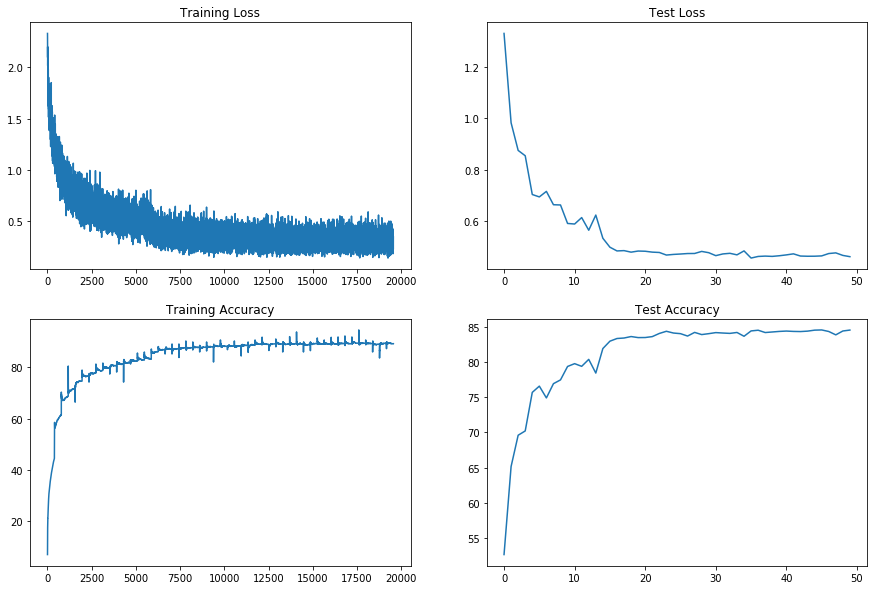

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")